In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Дискретное распределение

Сгенерируем выборку объёма 100 из дискретного распределения с шестью равновероятными исходами.

In [11]:
sample = np.random.choice([1,2,3,4,5,6], 1000)
sample1 = np.random.choice([1,2,3,4,5,6], 10000)
sample2 = np.random.choice([1,2,3,4,5,6], 10000)
sample3 = sample1 + sample2;

Представим теперь, что эта выборка была получена не искусственно, а путём подбрасывания симметричного шестигранного кубика 100 раз. Оценим вероятности выпадения каждой из сторон с помощью частот:

In [12]:
# посчитаем число выпадений каждой из сторон:
from collections import Counter

c = Counter(sample)

print("Число выпадений каждой из сторон:")    
print(c)

# теперь поделим на общее число подбрасываний и получим вероятности:
print("Вероятности выпадений каждой из сторон:")
print({k: v/1000.0 for k, v in c.items()})

Число выпадений каждой из сторон:
Counter({6: 186, 3: 169, 1: 164, 4: 163, 2: 163, 5: 155})
Вероятности выпадений каждой из сторон:
{6: 0.186, 3: 0.169, 1: 0.164, 4: 0.163, 2: 0.163, 5: 0.155}


Это и есть оценка функции вероятности дискретного распределения.

# Непрерывное распределение

Сгенерируем выборку объёма 100 из стандартного нормального распределения (с $\mu=0$ и $\sigma^2=1$):

In [77]:

norm_rv = sts.norm(0.285, 0.07)
sample = norm_rv.rvs(100)
#sample.sort()

Эмпирическая функция распределения для полученной выборки:

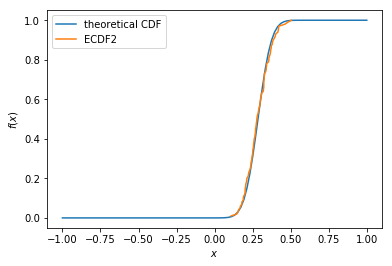

In [80]:
x = np.linspace(-1,1,100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)

#plt.step(ecdf.x, ecdf.y, label='ECDF')
plt.plot(ecdf.x, ecdf.y, label='ECDF2')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')
plt.show()

Гистограмма выборки:

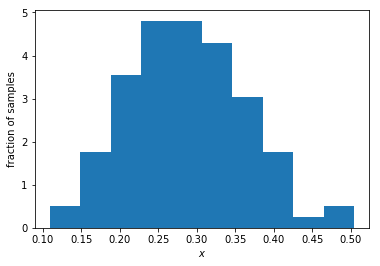

In [81]:
plt.hist(sample, normed=True, histtype='bar')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Попробуем задавать число карманов гистограммы вручную:

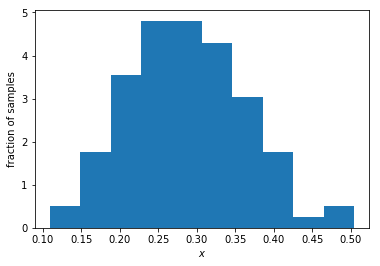

In [82]:
plt.hist(sample, bins=10, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.show()

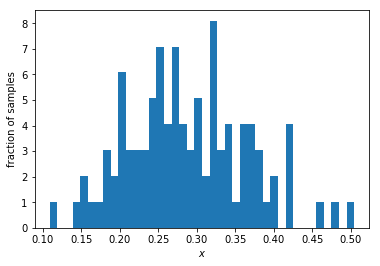

In [83]:
plt.hist(sample, bins=40, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания:

[  0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   1.28232508e-315   8.57476661e-297   1.51247224e-278   7.03709543e-261
   8.63655195e-244   2.79594266e-227   2.38757517e-211   5.37807395e-196
   3.19548959e-181   5.00828422e-167   2.07052962e-153   2.25795276e-140
   6.49514989e-128   4.92838272e-116   9.86417108e-105   5.20784066e-094
   7.25263300e-084   2.66424794e-074   2.58163295e-065   6.59865278e-057
   4.44894441e-049   7.91224275e-042   3.71178788e-035   4.59311816e-029
   1.49924638e-023   1.29086053e-018   2.93174745e-014   1.75636475e-010
   2.77551636e-007   1.15694787e-004   1.27211014e-002   3.68957685e-001
   2.82272993e+000   5.69643330e+000   3.03233814e+

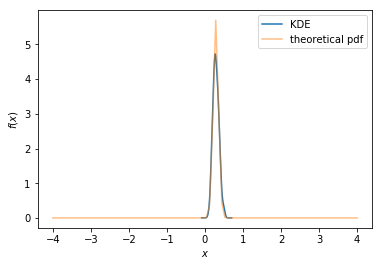

In [84]:
# для построения используем библиотеку Pandas:
df = pd.DataFrame(sample, columns=['KDE'])
#print (sample)
#print (df)
ax = df.plot(kind='density')

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
print(pdf)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')